In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'resized_train'
TEST_DIR = 'resized_test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
contempt completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      resized_train\angry\00a7cb9cf18d3a015a9e932952...     angry
1      resized_train\angry\00b7e4551ffa57ff4e2311b2ce...     angry
2      resized_train\angry\0118d3f7d8cbda624679c102f3...     angry
3      resized_train\angry\016e982434c5ffc7ee2fdc353b...     angry
4      resized_train\angry\01b4484e9f51114bbdaceb1e6b...     angry
...                                                  ...       ...
83923       resized_train\surprise\Training_99916297.jpg  surprise
83924       resized_train\surprise\Training_99924420.jpg  surprise
83925       resized_train\surprise\Training_99937001.jpg  surprise
83926       resized_train\surprise\Training_99951755.jpg  surprise
83927       resized_train\surprise\Training_99984132.jpg  surprise

[83928 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
contempt completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                               image     label
0                resized_test\angry\image0000008.jpg     angry
1                resized_test\angry\image0000014.jpg     angry
2                resized_test\angry\image0000038.jpg     angry
3                resized_test\angry\image0000049.jpg     angry
4                resized_test\angry\image0000092.jpg     angry
...                                              ...       ...
10926  resized_test\surprise\surprise_frame_5931.jpg  surprise
10927  resized_test\surprise\surprise_frame_5932.jpg  surprise
10928  resized_test\surprise\surprise_frame_5933.jpg  surprise
10929  resized_test\surprise\surprise_frame_5934.jpg  surprise
10930  resized_test\surprise\surprise_frame_5935.jpg  surprise

[10931 rows x 2 columns]
0                  resized_test\angry\image0000008.jpg
1                  resized_test\angry\image0000014.jpg
2                  resized_test\angry\image0000038.jpg
3                  resized_test\angry\image0000049.jp

In [8]:
from tqdm.notebook import tqdm
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),100,100,1)
    return features
train_features = extract_features(train['image']) 

  0%|          | 0/83928 [00:00<?, ?it/s]

C:\Users\rohan\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [9]:
test_features = extract_features(test['image'])

  0%|          | 0/10931 [00:00<?, ?it/s]

In [10]:
from sklearn.preprocessing import LabelEncoder
x_train = train_features/255.0
x_test = test_features/255.0
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [11]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [12]:
y_train = to_categorical(y_train,num_classes = 8)
y_test = to_categorical(y_test,num_classes = 8)

In [21]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(8, activation='softmax'))

In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [24]:
history=model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 5, validation_data = (x_test,y_test),callbacks=[early_stopping]) 

Epoch 1/5
656/656 [==============================] - 5966s 9s/step - loss: 1.9705 - accuracy: 0.2184 - val_loss: 1.9757 - val_accuracy: 0.2113
Epoch 2/5
656/656 [==============================] - 6290s 10s/step - loss: 1.7908 - accuracy: 0.3098 - val_loss: 1.6129 - val_accuracy: 0.3781
Epoch 3/5
656/656 [==============================] - 6152s 9s/step - loss: 1.5465 - accuracy: 0.4178 - val_loss: 1.4991 - val_accuracy: 0.4199
Epoch 4/5
656/656 [==============================] - 4987s 8s/step - loss: 1.4495 - accuracy: 0.4548 - val_loss: 1.4039 - val_accuracy: 0.4654
Epoch 5/5
656/656 [==============================] - 3670s 6s/step - loss: 1.4037 - accuracy: 0.4736 - val_loss: 1.3978 - val_accuracy: 0.4720


In [25]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector_CNN.h5")

C:\Users\rohan\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector_CNN.h5")

In [29]:
label = ['angry','contempt','disgust','fear','happy','neutral','sad','surprise']

In [32]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,100,100,1)
    return feature/255.0
    

In [33]:
image = 'resized_test\sad\image0000024.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 257ms/step
model prediction is  sad


original image is of sad
1/1 [==============================] - 0s 35ms/step
model prediction is  sad


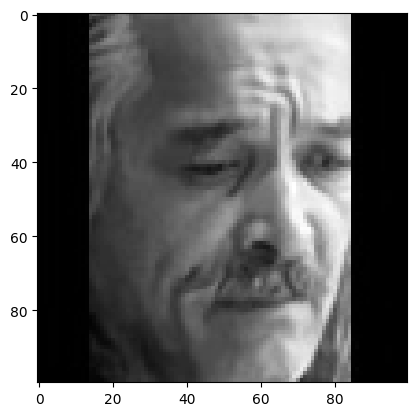

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
image = 'resized_test\\sad\\takeoffjacket_sad_1_a.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(100,100),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 50ms/step
model prediction is  angry


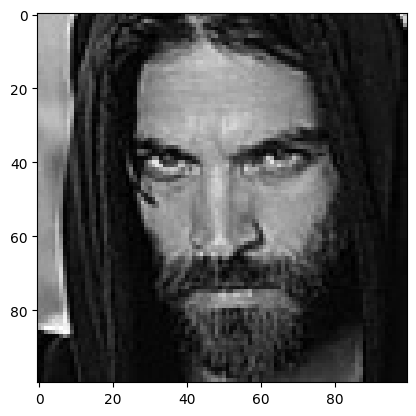

In [37]:
image = 'resized_test\\angry\\image0000008.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(100,100),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 43ms/step
model prediction is  happy


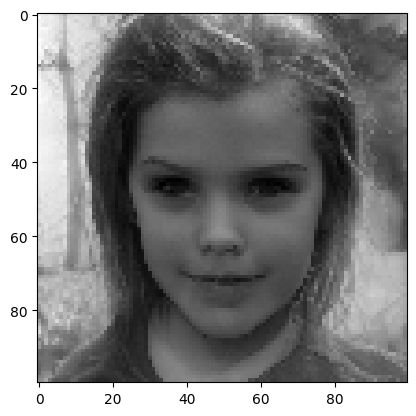

In [38]:
image = 'resized_test\happy\\5_ffhq_4636.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(100,100),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 48ms/step
model prediction is  surprise


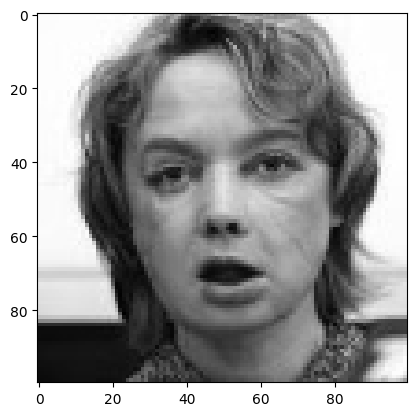

In [41]:
image = 'resized_test\surprise\image0000334.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(100,100),cmap='gray')